# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Restart the Kernel after you execute this command.

!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 216 kB 28.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 49.1 MB/s eta 0:00:01


**Important: Restart the Kernel at this moment**

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
mnist_transforms = transforms.Compose([
    transforms.ToTensor(), # Converts a PIL Image or numpy.ndarray to tensor and scales images to [0.0, 1.0]
    transforms.Normalize((0.1307,), (0.3081,)) # MNIST specific normalization mean and std
])

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=mnist_transforms
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64, # Common batch size for training
    shuffle=True   # Shuffle training data to ensure model doesn't learn order
)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=mnist_transforms
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1000, # Larger batch size for testing is often fine and faster
    shuffle=False  # No need to shuffle test data
)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training dataset size: 60000
Test dataset size: 10000
Number of batches in train_loader: 938
Number of batches in test_loader: 10

Shape of a batch of images from train_loader: torch.Size([64, 1, 28, 28])
Shape of a single image: torch.Size([1, 28, 28])
Data type of images: torch.float32

Shape of a batch of labels from train_loader: torch.Size([64])
Shape of a single label: torch.Size([])
Data type of labels: torch.int64

Min and Max pixel values in the first normalized image: -0.4242129623889923, 2.821486711502075

Showing 5 images from the training set (normalized as they go into the network):
7


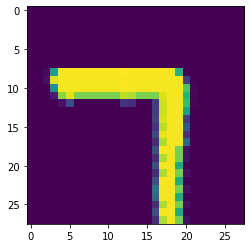

9


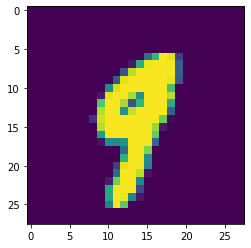

1


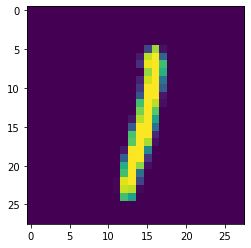

7


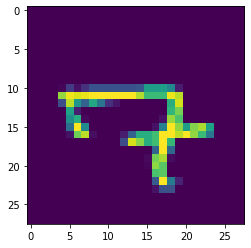

8


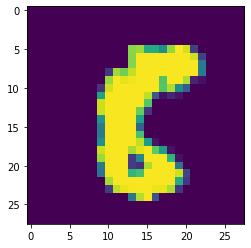


Showing 5 images from the training set (only ToTensor applied for viewing, no normalization):
Label: 0


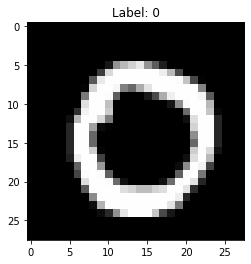

Label: 3


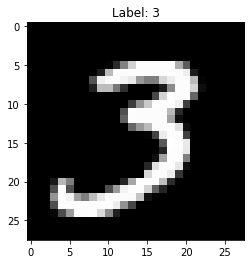

Label: 7


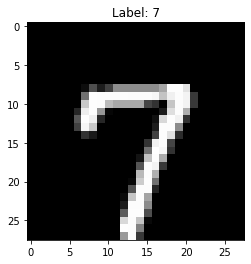

Label: 0


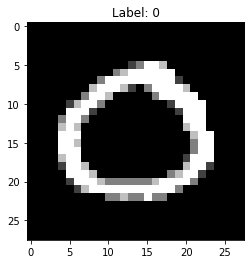

Label: 5


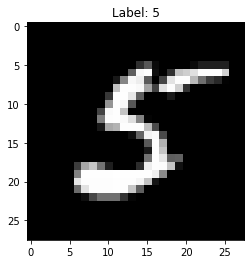


Unique labels in the training dataset: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [4]:
# Explore data
## YOUR CODE HERE ##
# Explore data
print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in test_loader: {len(test_loader)}")

# Get one batch of training images to inspect shapes
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"\nShape of a batch of images from train_loader: {images.shape}")
# Expected: (batch_size, channels, height, width) -> (64, 1, 28, 28)
print(f"Shape of a single image: {images[0].shape}")
# Expected: (channels, height, width) -> (1, 28, 28)
print(f"Data type of images: {images.dtype}")

print(f"\nShape of a batch of labels from train_loader: {labels.shape}")
# Expected: (batch_size,) -> (64,)
print(f"Shape of a single label: {labels[0].shape}")
# Expected: () or torch.Size([]) for a scalar tensor
print(f"Data type of labels: {labels.dtype}")

print(f"\nMin and Max pixel values in the first normalized image: {images[0].min()}, {images[0].max()}")

print("\nShowing 5 images from the training set (normalized as they go into the network):")
show5(train_loader)

# To view images without normalization for better visual inspection (optional but good for understanding)
view_transforms_unnormalized = transforms.Compose([
    transforms.ToTensor() # Just convert to tensor, no normalization
])
view_train_dataset_unnormalized = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=False, # Should already be downloaded
    transform=view_transforms_unnormalized
)
view_train_loader_unnormalized = torch.utils.data.DataLoader(
    view_train_dataset_unnormalized,
    batch_size=5, # We only need a few for viewing
    shuffle=True
)

print("\nShowing 5 images from the training set (only ToTensor applied for viewing, no normalization):")
# We need a slightly modified show5 or just directly plot if we want to un-normalize
# For simplicity, let's just use show5 which will now show un-normalized images (scaled 0-1)

def show5_unnormalized(img_loader): # Adjusted to show unnormalized images correctly
    dataiter = iter(img_loader)
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(f"Label: {int(labels[i].detach())}")
        image = images[i].numpy()
        # Squeeze removes single-dimensional entries from the shape of an array.
        # For MNIST, images are (1, 28, 28), squeeze makes it (28, 28) for imshow
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Label: {int(labels[i].detach())}")
        plt.show()

show5_unnormalized(view_train_loader_unnormalized)

# What are the unique classes/labels?
print(f"\nUnique labels in the training dataset: {train_dataset.targets.unique()}")
print(f"Classes: {train_dataset.classes}")

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [5]:
## YOUR CODE HERE ##
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        # MNIST images are 28x28 pixels.
        # When flattened, they become a vector of 28*28 = 784 features.
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128) # First hidden layer: 784 input features, 128 output features
        self.relu1 = nn.ReLU()           # Activation function for the first hidden layer
        self.dropout1 = nn.Dropout(0.25) # Dropout for regularization
        self.fc2 = nn.Linear(128, 64)    # Second hidden layer: 128 input features, 64 output features
        self.relu2 = nn.ReLU()           # Activation function for the second hidden layer
        self.dropout2 = nn.Dropout(0.25) # Dropout for regularization
        self.fc3 = nn.Linear(64, 10)     # Output layer: 64 input features, 10 output features (for digits 0-9)
                                         # No softmax here, as nn.CrossEntropyLoss will apply it.

    def forward(self, x):
        x = self.flatten(x)    # Flatten the input image
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)        # Output raw scores (logits)
        return x



Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
model = MNISTClassifier()

# Loss function: CrossEntropyLoss is suitable for multi-class classification problems.
# It combines LogSoftmax and NLLLoss in one single class.
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam is a popular choice that often works well with default parameters.
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")
print(model) 

Using device: cuda
MNISTClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.25, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
num_epochs = 15 # Can be adjusted
train_losses_epoch = []
train_accuracies_epoch = []
validation_losses_epoch = []
validation_accuracies_epoch = []

print(f"Starting training on device: {device}")

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_train_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * images.size(0) # loss.item() is avg loss for batch

        # Calculate training accuracy for the batch
        _, predicted = torch.max(outputs.data, 1)
        total_train_samples += labels.size(0)
        correct_train_predictions += (predicted == labels).sum().item()

        if (batch_idx + 1) % 250 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Batch Loss: {loss.item():.4f}')

    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    epoch_train_accuracy = 100 * correct_train_predictions / total_train_samples
    train_losses_epoch.append(epoch_train_loss)
    train_accuracies_epoch.append(epoch_train_accuracy)

    # Validation loop (using the test_loader as a validation set)
    model.eval()  # Set the model to evaluation mode
    running_validation_loss = 0.0
    correct_validation_predictions = 0
    total_validation_samples = 0
    with torch.no_grad(): # Disable gradient calculations for validation
        for images_val, labels_val in test_loader:
            images_val, labels_val = images_val.to(device), labels_val.to(device)
            outputs_val = model(images_val)
            loss_val = criterion(outputs_val, labels_val)
            running_validation_loss += loss_val.item() * images_val.size(0)

            _, predicted_val = torch.max(outputs_val.data, 1)
            total_validation_samples += labels_val.size(0)
            correct_validation_predictions += (predicted_val == labels_val).sum().item()

    epoch_validation_loss = running_validation_loss / len(test_loader.dataset)
    epoch_validation_accuracy = 100 * correct_validation_predictions / total_validation_samples
    validation_losses_epoch.append(epoch_validation_loss)
    validation_accuracies_epoch.append(epoch_validation_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}]: \n"
          f"  Training Loss: {epoch_train_loss:.4f}, Training Accuracy: {epoch_train_accuracy:.2f}%\n"
          f"  Validation Loss: {epoch_validation_loss:.4f}, Validation Accuracy: {epoch_validation_accuracy:.2f}%")
    print("-" * 50)

print('Finished Training')

Starting training on device: cuda
Epoch [1/15], Step [250/938], Batch Loss: 0.2510
Epoch [1/15], Step [500/938], Batch Loss: 0.2736
Epoch [1/15], Step [750/938], Batch Loss: 0.1904
Epoch [1/15]: 
  Training Loss: 0.3657, Training Accuracy: 88.84%
  Validation Loss: 0.1449, Validation Accuracy: 95.55%
--------------------------------------------------
Epoch [2/15], Step [250/938], Batch Loss: 0.0529
Epoch [2/15], Step [500/938], Batch Loss: 0.1496
Epoch [2/15], Step [750/938], Batch Loss: 0.1286
Epoch [2/15]: 
  Training Loss: 0.1841, Training Accuracy: 94.50%
  Validation Loss: 0.1085, Validation Accuracy: 96.66%
--------------------------------------------------
Epoch [3/15], Step [250/938], Batch Loss: 0.1277
Epoch [3/15], Step [500/938], Batch Loss: 0.0717
Epoch [3/15], Step [750/938], Batch Loss: 0.2850
Epoch [3/15]: 
  Training Loss: 0.1459, Training Accuracy: 95.58%
  Validation Loss: 0.0937, Validation Accuracy: 97.14%
--------------------------------------------------
Epoch [4/

Plot the training loss (and validation loss/accuracy, if recorded).

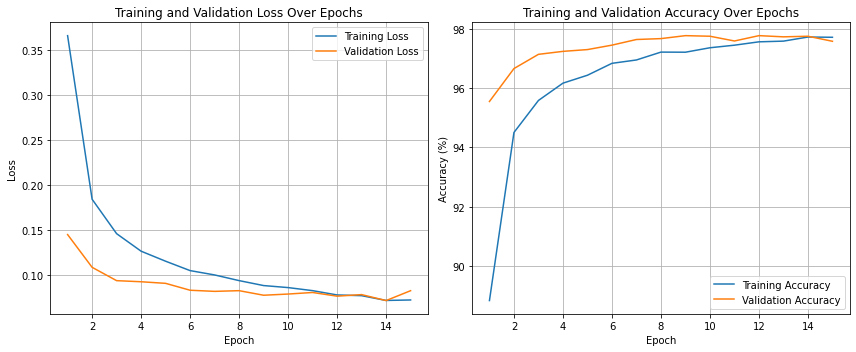

In [10]:
## YOUR CODE HERE ##
# Plotting the training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses_epoch, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_losses_epoch, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies_epoch, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), validation_accuracies_epoch, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##
model.eval()  # Set the model to evaluation mode
correct_test = 0
total_test = 0
test_loss_final = 0.0

with torch.no_grad():  # Disable gradient calculations during testing
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss_final += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

final_test_accuracy = 100 * correct_test / total_test
final_test_loss = test_loss_final / len(test_loader.dataset)

print(f'Final Test Loss of the trained model: {final_test_loss:.4f}')
print(f'Final Test Accuracy of the trained model on the {total_test} test images: {final_test_accuracy:.2f}%')

if final_test_accuracy < 90:
    print("\nModel accuracy is below 90%. Consider the following improvements:")
    print("- Increase the number of epochs.")
    print("- Try a different learning rate (smaller or larger with a scheduler).")
    print("- Experiment with different optimizers (e.g., SGD with momentum, RMSprop).")
    print("- Adjust the model architecture (e.g., number of layers, number of neurons per layer, different activation functions).")
    print("- Modify dropout rates (increase if overfitting, decrease if underfitting).")
    print("- Implement learning rate scheduling.")
    print("- Consider more advanced data augmentation if not already used (though less critical for MNIST).")
else:
    print("\nGreat work! Model accuracy is above 90%.")

Final Test Loss of the trained model: 0.0826
Final Test Accuracy of the trained model on the 10000 test images: 97.58%

Great work! Model accuracy is above 90%.


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!


--- Starting Training for Model v2 ---
Optimizer: SGD with momentum, LR=0.01, Scheduler: StepLR
Number of epochs: 20
Epoch [1/20]: 
  Training Loss: 0.4187, Training Accuracy: 87.35%
  Validation Loss: 0.1476, Validation Accuracy: 95.53% (LR: 1.0e-02)
--------------------------------------------------
Epoch [2/20]: 
  Training Loss: 0.1891, Training Accuracy: 94.39%
  Validation Loss: 0.1101, Validation Accuracy: 96.60% (LR: 1.0e-02)
--------------------------------------------------
Epoch [3/20]: 
  Training Loss: 0.1498, Training Accuracy: 95.52%
  Validation Loss: 0.0895, Validation Accuracy: 97.20% (LR: 1.0e-02)
--------------------------------------------------
Epoch [4/20]: 
  Training Loss: 0.1290, Training Accuracy: 96.14%
  Validation Loss: 0.0914, Validation Accuracy: 97.10% (LR: 1.0e-02)
--------------------------------------------------
Epoch [5/20]: 
  Training Loss: 0.1142, Training Accuracy: 96.62%
  Validation Loss: 0.0889, Validation Accuracy: 97.30% (LR: 1.0e-02)
---

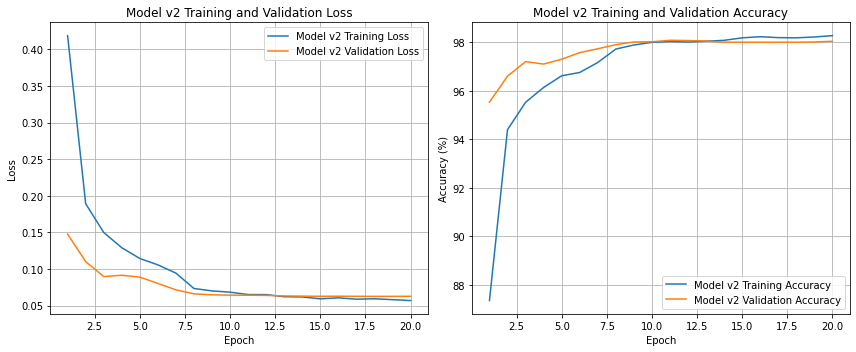

In [12]:
## YOUR CODE HERE ##
# Improving your model

# Let's define a new model instance or re-initialize the existing one for a new training run
# We can try a different optimizer, learning rate, or more epochs.
# For this example, let's try SGD with momentum and a slightly adjusted learning rate,
# and increase epochs. We will also keep the dropout layers from the previous model definition.

model_v2 = MNISTClassifier().to(device) # New instance of the same architecture

# Loss function (can be the same)
criterion_v2 = nn.CrossEntropyLoss()

# Optimizer: Try SGD with momentum
optimizer_v2 = optim.SGD(model_v2.parameters(), lr=0.01, momentum=0.9)
# Alternatively, you could try Adam with a smaller learning rate:
# optimizer_v2 = optim.Adam(model_v2.parameters(), lr=0.0005)

# Learning rate scheduler (optional but often helpful)
# This will reduce the learning rate by a factor of 0.1 every 7 epochs
scheduler_v2 = torch.optim.lr_scheduler.StepLR(optimizer_v2, step_size=7, gamma=0.1)


num_epochs_v2 = 20 # Try more epochs
train_losses_epoch_v2 = []
train_accuracies_epoch_v2 = []
validation_losses_epoch_v2 = []
validation_accuracies_epoch_v2 = []

print(f"\n--- Starting Training for Model v2 ---")
print(f"Optimizer: SGD with momentum, LR=0.01, Scheduler: StepLR")
print(f"Number of epochs: {num_epochs_v2}")

for epoch in range(num_epochs_v2):
    model_v2.train()
    running_train_loss_v2 = 0.0
    correct_train_predictions_v2 = 0
    total_train_samples_v2 = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer_v2.zero_grad()
        outputs = model_v2(images)
        loss = criterion_v2(outputs, labels)
        loss.backward()
        optimizer_v2.step()

        running_train_loss_v2 += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train_samples_v2 += labels.size(0)
        correct_train_predictions_v2 += (predicted == labels).sum().item()

    epoch_train_loss_v2 = running_train_loss_v2 / len(train_loader.dataset)
    epoch_train_accuracy_v2 = 100 * correct_train_predictions_v2 / total_train_samples_v2
    train_losses_epoch_v2.append(epoch_train_loss_v2)
    train_accuracies_epoch_v2.append(epoch_train_accuracy_v2)

    # Validation loop for model_v2
    model_v2.eval()
    running_validation_loss_v2 = 0.0
    correct_validation_predictions_v2 = 0
    total_validation_samples_v2 = 0
    with torch.no_grad():
        for images_val, labels_val in test_loader:
            images_val, labels_val = images_val.to(device), labels_val.to(device)
            outputs_val = model_v2(images_val)
            loss_val = criterion_v2(outputs_val, labels_val)
            running_validation_loss_v2 += loss_val.item() * images_val.size(0)
            _, predicted_val = torch.max(outputs_val.data, 1)
            total_validation_samples_v2 += labels_val.size(0)
            correct_validation_predictions_v2 += (predicted_val == labels_val).sum().item()

    epoch_validation_loss_v2 = running_validation_loss_v2 / len(test_loader.dataset)
    epoch_validation_accuracy_v2 = 100 * correct_validation_predictions_v2 / total_validation_samples_v2
    validation_losses_epoch_v2.append(epoch_validation_loss_v2)
    validation_accuracies_epoch_v2.append(epoch_validation_accuracy_v2)
    
    # Step the scheduler
    scheduler_v2.step()

    print(f"Epoch [{epoch+1}/{num_epochs_v2}]: \n"
          f"  Training Loss: {epoch_train_loss_v2:.4f}, Training Accuracy: {epoch_train_accuracy_v2:.2f}%\n"
          f"  Validation Loss: {epoch_validation_loss_v2:.4f}, Validation Accuracy: {epoch_validation_accuracy_v2:.2f}% "
          f"(LR: {optimizer_v2.param_groups[0]['lr']:.1e})")
    print("-" * 50)

print('Finished Training Model v2')

# Final test for model_v2
model_v2.eval()
correct_test_v2 = 0
total_test_v2 = 0
test_loss_final_v2 = 0.0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_v2(images)
        loss = criterion_v2(outputs, labels)
        test_loss_final_v2 += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_test_v2 += labels.size(0)
        correct_test_v2 += (predicted == labels).sum().item()

final_test_accuracy_v2 = 100 * correct_test_v2 / total_test_v2
final_test_loss_v2 = test_loss_final_v2 / len(test_loader.dataset)
print(f'\nFinal Test Loss of Model_v2: {final_test_loss_v2:.4f}')
print(f'Final Test Accuracy of Model_v2 on the {total_test_v2} test images: {final_test_accuracy_v2:.2f}%')


# Plotting for model_v2
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs_v2 + 1), train_losses_epoch_v2, label='Model v2 Training Loss')
plt.plot(range(1, num_epochs_v2 + 1), validation_losses_epoch_v2, label='Model v2 Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model v2 Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs_v2 + 1), train_accuracies_epoch_v2, label='Model v2 Training Accuracy')
plt.plot(range(1, num_epochs_v2 + 1), validation_accuracies_epoch_v2, label='Model v2 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Model v2 Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
## YOUR CODE HERE ##
# Saving your model
# We'll save the model with the higher final test accuracy.

model_to_save = None
saved_model_accuracy = 0.0

if 'final_test_accuracy_v2' in locals() and final_test_accuracy_v2 > final_test_accuracy:
    model_to_save = model_v2
    saved_model_accuracy = final_test_accuracy_v2
    print(f"Model v2 performed better with accuracy: {final_test_accuracy_v2:.2f}%")
else:
    model_to_save = model
    saved_model_accuracy = final_test_accuracy
    print(f"Original model performed better (or equally) with accuracy: {final_test_accuracy:.2f}%")

if model_to_save:
    # It's generally recommended to save the model's state_dict rather than the entire model.
    torch.save(model_to_save.state_dict(), 'mnist_classifier_best_model.pth')
    print(f"Saved the model with {saved_model_accuracy:.2f}% accuracy to 'mnist_classifier_best_model.pth'")
else:
    print("No model was trained successfully to save.")



Model v2 performed better with accuracy: 98.04%
Saved the model with 98.04% accuracy to 'mnist_classifier_best_model.pth'
